# Flux footprint

## Flux footprint parametrizations
The calculation of a 2d flux footprint makes it possible to estimate the size of the surface that contributes to the measured flux. This also allows to analyze whether changes in the flux result from a change in the footprint (e.g. surface composition, vegetation, surface roughness). Here the flux footprint parametrization according to @Kormann2001 and @Kljun2015 are used. <br>
The mathematical idea for deriving a flux footprint parametrization is to express the flux ($F_c$) as integral over the distribution of its sinks and sources ($S_c$) times a transfer function $f$ (the flux footprint):
$$
    F_c(0,0,z) = \int\int S_c(x,y) f(x,y) \:dx\,dy
$$
By treating streamwise and crosswise velocity independently, the footprint can be expressed as product of the crosswind-integrated footprint ($\overline{f^y}(x)$ which is then only a function of $x$) and a function expressing the crosswind dispersion ($D_y$) through
$$
    f(x,y) = \overline{f^y}(x)D_y.
$$
This assumption leads to a symmtric footprint in crosswind direction. For further derivations a concrete footprint model has to be applied, which is in @Kljun2015 an advanced Lagrangian particle dispersion model (LPDM-B) based on 3d particle backtracking between surface and boundary layer height $h$ that is valid for steady flows under all stabilities. The @Kormann2001 model is a simple analytical transport model. There are several other approaches to flux footprint estimation (e.g. @Hsieh2000), and they result in (quite) different surface areas, so the used method has to be chosen carefully. 

In [1]:
#load Reddy package
install.packages("../src/Reddy_0.0.0.9000.tar.gz",repos=NULL,source=TRUE,quiet=TRUE)
library(Reddy)

#read in processed example data
dat=readRDS("../data/ec-data_30min_processed/processed_data_example.rds")

#select file
i=8 #daytime example

## 2D flux footprint estimate
### Calculate 2D flux footprint estimate with `calc_flux_footprint`
The function `calc_flux_footprint`uses the 2d flux footprint parametrization (FFP) according to @Kljun2015 to calculate the footprint based on measurement height `zm`, mean horizontal wind speed `u_mean`, boundary layer height `h`, Obukhov length `L` (`calc_L`), standard deviation of cross-wind component `v_sd` and either friction velocity `ustar`(`calc_ustar`) or surface roughness length `z0` in a resolution given by `nres`. The boundary layer height can be taken from e.g. ERA5.

In [2]:
ustar=calc_ustar(dat$cov_uw,dat$cov_vw)
L=calc_L(ustar,dat$T_mean,dat$cov_wT)
zm=4.4
h=700

#Kljun et al, 2015
ffp=calc_flux_footprint_Kljun2015(zm=zm,ws_mean=dat$u_mean[i],blh=h,L=L[i],v_sd=dat$v_sd[i],ustar=ustar[i],plot=FALSE)
str(ffp)

List of 6
 $ xmax          : num 23
 $ x             : num [1:1000] -793 -791 -790 -788 -787 ...
 $ y             : num [1:1000] -793 -791 -790 -788 -787 ...
 $ fy_mean       : num [1:999] 3.43e-20 3.60e-10 5.56e-07 1.85e-05 1.37e-04 ...
 $ f2d           : num [1:1000, 1:1000] 0 0 0 0 0 0 0 0 0 0 ...
 $ contour_levels: num [1:9] 0.9 0.8 0.7 0.6 0.5 0.4 0.3 0.2 0.1


Therein, `fy_mean` represents the crosswind-integrated footprint with coordinates `x` and `xmax` the location of the maximum footprint. `(x2d, y2d, f2d)` represent the 2d flux footprint and `(xcontour, ycontour)` the contour lines of the respective contour levels, which can be specified in the `contours`argument in `calc_flux_footprint`. The output list `ffp` can be easily plotted using the function `plot_flux_footprint`, as shown in the following.

In [3]:
#Kormann and Meixner, 2001
i=3
ffp_KM=calc_flux_footprint_KM2001(zm=zm,ws_mean=dat$u_mean[i],wd_mean=dat$wd_mean[i],L=L[i],v_sd=dat$v_sd[i],ustar=ustar[i],plot=FALSE)
str(ffp)

List of 6
 $ xmax          : num 23
 $ x             : num [1:1000] -793 -791 -790 -788 -787 ...
 $ y             : num [1:1000] -793 -791 -790 -788 -787 ...
 $ fy_mean       : num [1:999] 3.43e-20 3.60e-10 5.56e-07 1.85e-05 1.37e-04 ...
 $ f2d           : num [1:1000, 1:1000] 0 0 0 0 0 0 0 0 0 0 ...
 $ contour_levels: num [1:9] 0.9 0.8 0.7 0.6 0.5 0.4 0.3 0.2 0.1


### Plotting of flux footprint with `plot_flux_footprint`

The function `plot_flux_footprint` takes as input an object returned by `calc_flux_footprint` and plots the cross-wind integrated footprint and the 2d footprint.

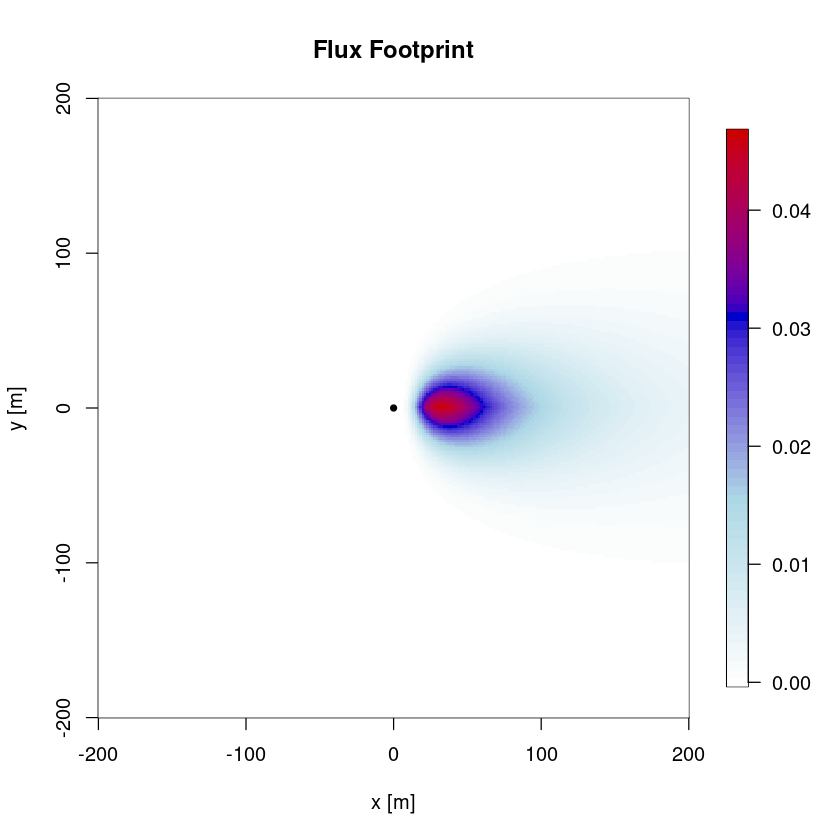

In [4]:
plot_flux_footprint(ffp) 

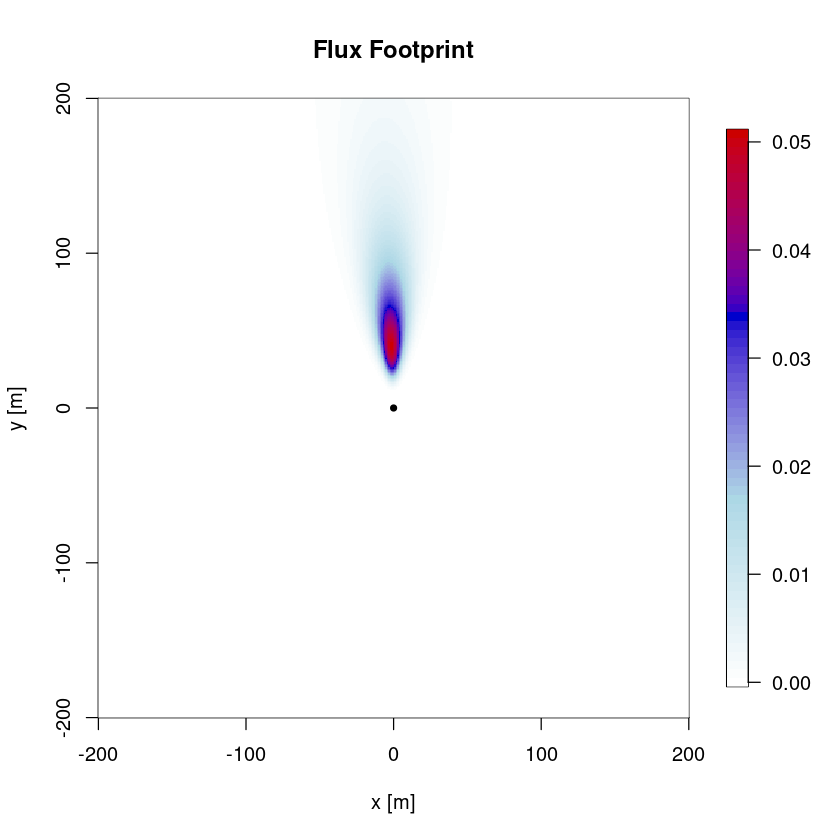

In [5]:
plot_flux_footprint(ffp_KM) #different time step and rotated according to wind direction

## Flux footprint climatology
Flux footprint climatologies can be created as composites of single flux footprints by averaging over several FFP calculations (with `calc_flux_footprint_climatology` for both discussed flux footprint models).

In [ ]:
i=8:10
ffp_clim=calc_flux_footprint_climatology(zm=zm,ws_mean=dat$u_mean[i],wd_mean=dat$wd_mean[i],L=L[i],
                                         v_sd=dat$v_sd[i],ustar=ustar[i],method="KM2001",plot=FALSE)

The flux footprint (climatology) can then be plotted on an aerial photo or an ecosystem type classification, see e.g. @Kljun2015 therein Fig. 5 or @Pirk2023 therein Fig. 4.